In [ ]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
%matplotlib inline


In [16]:
df= pd.read_csv('C:\\Users\\Saeed Khan\Desktop\\krishnaik\\sql\\EDA\\googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum() # null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.describe() # numeric feature 

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.shape

(10841, 13)

# **Data cleaning**
- The dataset has missing values

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Insights and Observations
- The dataset contains 10,000 rows and 12 columns.

In [30]:
df['Reviews'].astype('int')

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int32

In [18]:
df['Reviews'].unique() # unique values in reviews in string format

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [19]:
df['Reviews'].str.isnumeric().sum() # check if reviews are numeric or not



10840

In [22]:
df[~df['Reviews'].str.isnumeric()] # check if reviews are numeric or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
df_copy=df.copy() # create a copy of the dataframe
df_copy['Reviews'] = df_copy['Reviews'].str.replace('M','000000') # replace M with 000000

In [27]:
df=df_copy.drop(df_copy.index[10472])# drop the row with index 10472

In [28]:
df[~df['Reviews'].str.isnumeric()] # check if reviews are numeric or not

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [29]:
# convert the reviews column to numeric
df_copy['Reviews']=df_copy['Reviews'].astype('int') # convert the reviews column to int

ValueError: invalid literal for int() with base 10: '3.0000000'

In [41]:
df_copy['Reviews'] = pd.to_numeric(df_copy['Reviews'], errors='coerce')
df_copy['Reviews'] = df_copy['Reviews'].fillna(0).astype(int)


In [45]:
# First, see original values
print("Original Reviews values:", df_copy['Reviews'].unique())

# Now clean properly
df_copy['Reviews'] = pd.to_numeric(df_copy['Reviews'], errors='coerce')  # invalid = NaN
df_copy = df_copy.dropna(subset=['Reviews'])  # drop rows with invalid Reviews
df_copy['Reviews'] = df_copy['Reviews'].astype(int)  # convert to int


Original Reviews values: [0]


In [46]:
df_copy.dtypes # check the data type of reviews column

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [42]:
print(df_copy['Reviews'].unique())

[0]


In [31]:
df_copy['Reviews'] = df_copy['Reviews'].astype(float).astype(int)


In [39]:

df_copy['Reviews'].unique() # check the unique values in reviews column

array([dtype('int32')], dtype=object)

In [34]:
df_copy.dtypes # check the data type of reviews column

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [50]:
[df_copy['Size'].unique()] # check the unique values in size column

[array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
        '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
        '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
        '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
        '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
        '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
        '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
        '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
        '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
        '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
        '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
        '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
        '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
        '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k',

In [52]:
df_copy['Size']=df_copy['Size'].str.replace('M','000') # replace M will k
df_copy['Size']

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10841, dtype: object

In [53]:
df_copy['Size']=df_copy['Size'].str.replace('k','') # replace M will k
df_copy['Size']

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10841, dtype: object

In [57]:
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan) # replace M will k
df_copy['Size']


0         19000
1         14000
2        8.7000
3         25000
4        2.8000
          ...  
10836     53000
10837    3.6000
10838    9.5000
10839       NaN
10840     19000
Name: Size, Length: 10841, dtype: object

In [58]:
df_copy['Size'].isnull().sum() # check if there are any null values in size column

1695

In [59]:
df_copy['Size'].unique() # check the unique values in size column

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [64]:
# Remove '+' and ',' from the Size column
df_copy['Size'] = df_copy['Size'].str.replace('+', '', regex=False)
df_copy['Size'] = df_copy['Size'].str.replace(',', '', regex=False)

# Convert to float safely
df_copy['Size'] = pd.to_numeric(df_copy['Size'], errors='coerce')

# Optional: fill NaNs with 0 or drop them
df_copy['Size'] = df_copy['Size'].fillna(0)


In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


In [68]:
import numpy as np

# Ensure all values are strings
df_copy['Size'] = df_copy['Size'].astype(str)

# Replace 'M' with '000', 'k' with '', and 'Varies with device' with NaN
df_copy['Size'] = df_copy['Size'].str.replace('M', '000', regex=False)
df_copy['Size'] = df_copy['Size'].str.replace('k', '', regex=False)
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

# Remove '+' and ',' if needed
df_copy['Size'] = df_copy['Size'].str.replace('+', '', regex=False)
df_copy['Size'] = df_copy['Size'].str.replace(',', '', regex=False)

# Convert to numeric
df_copy['Size'] = pd.to_numeric(df_copy['Size'], errors='coerce')


In [71]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        0.0
10840    19000.0
Name: Size, Length: 10841, dtype: float64

In [73]:
df_copy.dtypes # check the data type of reviews column

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [76]:
df_copy.info() # check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


In [77]:
df_copy.isnull().sum() # check if there are any null values in the dataframe

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [78]:
df_copy['Type'].unique() # check the unique values in type column

array(['Free', 'Paid', nan, '0'], dtype=object)

In [79]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,0,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,0,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,0,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [80]:
df_copy['Installs'].unique() # check the unique values in installs column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [81]:
import pandas as pd
import numpy as np

# Clean the 'Installs' column
df_copy['Installs'] = df_copy['Installs'].astype(str)  # Ensure all values are strings
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '', regex=False)  # Remove '+'
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '', regex=False)  # Remove commas
df_copy['Installs'] = df_copy['Installs'].replace('Free', np.nan)  # Replace 'Free' with NaN

# Convert to numeric (int)
df_copy['Installs'] = pd.to_numeric(df_copy['Installs'], errors='coerce')

In [82]:
df_copy['Installs'].unique() # check the unique values in installs column

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [84]:
df_copy.dtypes # check the data type of reviews column

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [85]:
df_copy['Price'].unique() # check the unique values in price column

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [86]:
import numpy as np
import pandas as pd

# Ensure all values are strings first
df_copy['Price'] = df_copy['Price'].astype(str)

# Remove $ sign
df_copy['Price'] = df_copy['Price'].str.replace('$', '', regex=False)

# Replace non-numeric values like 'Everyone' with NaN
df_copy['Price'] = pd.to_numeric(df_copy['Price'], errors='coerce')


In [87]:
df_copy['Price'].unique() # check the unique values in price column

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [88]:
df_copy.dtypes # check the data type of reviews column

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [89]:
df_copy.isnull().sum() # check if there are any null values in the dataframe

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [91]:
df_copy['Type'].unique() # check the unique values in content rating column

array(['Free', 'Paid', nan, '0'], dtype=object)

In [92]:
df_copy['Last Updated'].unique() # check the unique values in last updated column

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [99]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'], errors='coerce') # convert the last updated column to datetime
df_copy['Day']=df_copy['Last Updated'].dt.day.astype(int) # extract the day from last updated column
df_copy['Month']=df_copy['Last Updated'].dt.month.astype(int)# extract the month from last updated column
df_copy['Year']=df_copy['Last Updated'].dt.year.astype(int) # extract the year from last updated column


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [100]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'], errors='coerce')

In [101]:
df_copy['Day'] = df_copy['Last Updated'].dt.day.astype('Int64')
df_copy['Month'] = df_copy['Last Updated'].dt.month.astype('Int64')
df_copy['Year'] = df_copy['Last Updated'].dt.year.astype('Int64')


In [102]:
df_copy = df_copy.dropna(subset=['Last Updated'])


In [103]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  Int64         
 14  Month           10840 non-null  Int64         
 15  Year   

In [104]:
df_copy.to_csv('cleaned_dataset.csv', index=False)


# **EDA on clean dataset**

In [109]:
df_copy.head(2) # check the first 5 rows of the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [111]:
df_copy['Genres'].unique() # check the unique values in genres column

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [112]:
df_copy.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated,Day,Month,Year
count,9366.000000,10840.0,10840.000000,1.084000e+04,10840.000000,10840,10840.0,10840.0,10840.0
mean,4.191757,0.0,16517.877777,1.546434e+07,1.027368,2017-11-21 06:43:02.435424256,15.609041,6.422325,2017.399723
min,1.000000,0.0,0.000000,0.000000e+00,0.000000,2010-05-21 00:00:00,1.0,1.0,2010.0
25%,4.000000,0.0,3.100000,1.000000e+03,0.000000,2017-09-20 00:00:00,6.0,5.0,2017.0
50%,4.300000,0.0,267.500000,1.000000e+05,0.000000,2018-05-24 00:00:00,16.0,7.0,2018.0
75%,4.500000,0.0,26000.000000,5.000000e+06,0.000000,2018-07-20 00:00:00,24.0,8.0,2018.0
max,5.000000,0.0,100000.000000,1.000000e+09,400.000000,2018-08-08 00:00:00,31.0,12.0,2018.0
std,0.515219,0.0,23199.242588,8.502936e+07,15.949703,NaN,9.561621,2.578388,1.100914


In [113]:
df_copy.info() # check the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  Int64         
 14  Month           10840 non-null  Int64         
 15  Year   

In [115]:
df_copy['Content Rating'].duplicated().sum()

10834

In [137]:
df_copy[df_copy.duplicated('App')].shape # check the duplicated values in app column

(1181, 16)

# Observations
- The dataset contain duplicate records.

In [138]:
df_copy.drop_duplicates(subset=['App'], keep='first', inplace=True) # drop the duplicated values in app column

C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\2849394152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop_duplicates(subset=['App'], keep='first', inplace=True) # drop the duplicated values in app column


In [139]:
df_copy.shape # check the shape of the dataframe after dropping the duplicates

(9659, 16)

# **Explore the dataset more**

In [140]:
# Separate numeric and categorical columns
numeric_columns = df_copy.select_dtypes(include=['int64', 'float64', 'Int64']).columns
categorical_columns = df_copy.select_dtypes(include=['object']).columns

# Display the results
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Rating', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year'], dtype='object')
Categorical Columns: Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [143]:
# For numeric columns
numeric_cols = df_copy.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:\n", numeric_cols)

# For categorical columns
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:\n", categorical_cols)


Numeric columns:
 ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

Categorical columns:
 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


# **Proportion of count data on categorical columns**

In [145]:
# Make sure we're only using variables defined in this code block
# Identify different column types in the dataframe
numeric_cols = df_copy.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:\n", numeric_cols)

# Explicitly define categorical columns (fix for name error)
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:\n", categorical_cols)

# Show percentage value counts for each categorical column
print("\n========== CATEGORICAL COLUMN ANALYSIS ==========")
for col in categorical_cols:
    # Create a header with column name
    print(f"\nColumn: {col}")
    print("-" * 40)
    
    # Calculate and display percentage distributions
    value_counts_pct = df_copy[col].value_counts(normalize=True) * 100
    
    # Format the output with percentage symbol and round to 2 decimal places
    formatted_counts = value_counts_pct.apply(lambda x: f"{x:.2f}%")
    
    # Print the values and their percentages
    for value, percentage in zip(value_counts_pct.index, formatted_counts):
        print(f"{value}: {percentage}")
    
    # Add a separator between columns
    print("=" * 40)

Numeric columns:
 ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

Categorical columns:
 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']

========== CATEGORICAL COLUMN ANALYSIS ==========

Column: App
----------------------------------------
Photo Editor & Candy Camera & Grid & ScrapBook: 0.01%
Tic Tac CK: 0.01%
INFAMY RO: 0.01%
CK Call NEW: 0.01%
Ck Coif: 0.01%
CONTRACT KILLER: ZOMBIES: 0.01%
CK Shop: 0.01%
FlexBook: 0.01%
Can Knockdown 3: 0.01%
Fu*** Weather (Funny Weather): 0.01%
OB-GYN USMLE Stp2 CK 300 Q & A: 0.01%
CK Active: 0.01%
USMLE CK Clinical Knowledge Flashcards 2018 Ed: 0.01%
Night Camera Blur Effect: 0.01%
Camera V7 24 Megapixel: 0.01%
CL Mobile Pro - Classifieds for Craigslist: 0.01%
cloudLibrary: 0.01%
CK Pharmacies: 0.01%
Company Kitchen Inventory: 0.01%
CL Pro App for Craigslist: 0.01%
USMLE Step 2 CK Cards Lite: 0.01%
F*ck This Game: 0.01%
211:CK: 0.01%
CONTRACT KILLER: ZOMBIES (NR): 0.01%
ck-modelcars

# **Proportion of count data on categorical columns**

C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\390185649.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X=df_copy[numeric_cols[i]], shade=True, color='r')
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\390185649.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X=df_copy[numeric_cols[i]], shade=True, color='r')
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\390185649.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X=df_copy[numeric_cols[i]], shade=True, color='r')
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\390185649.py:6: FutureWarning: 

`shade` is now deprecated in favor o

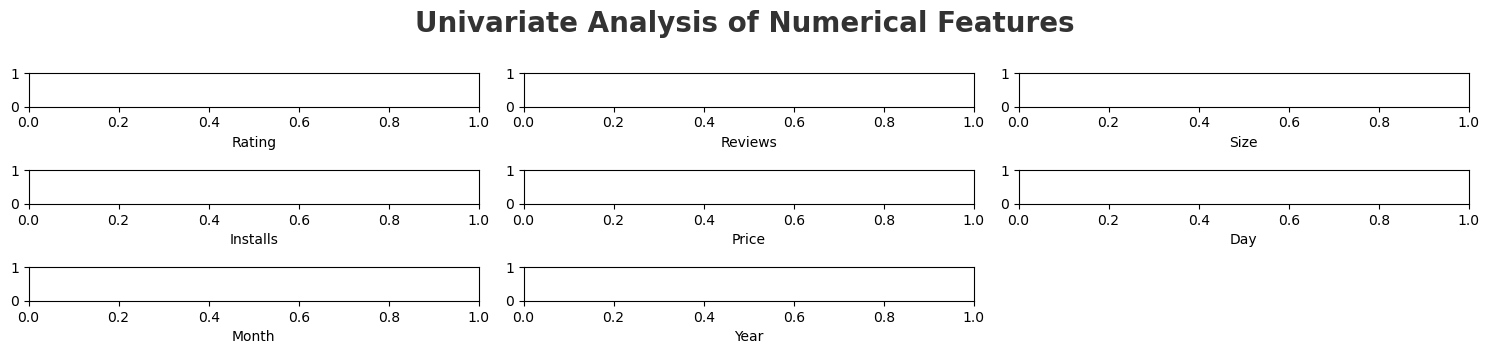

In [151]:
plt.figure(figsize=(15, 5))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numeric_cols)):
    plt.subplot(5, 3, i+1)  # Changed i=1 to i+1
    sns.kdeplot(X=df_copy[numeric_cols[i]], shade=True, color='r')
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()

c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\1172037201.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=data, fill=True, color='r')
c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

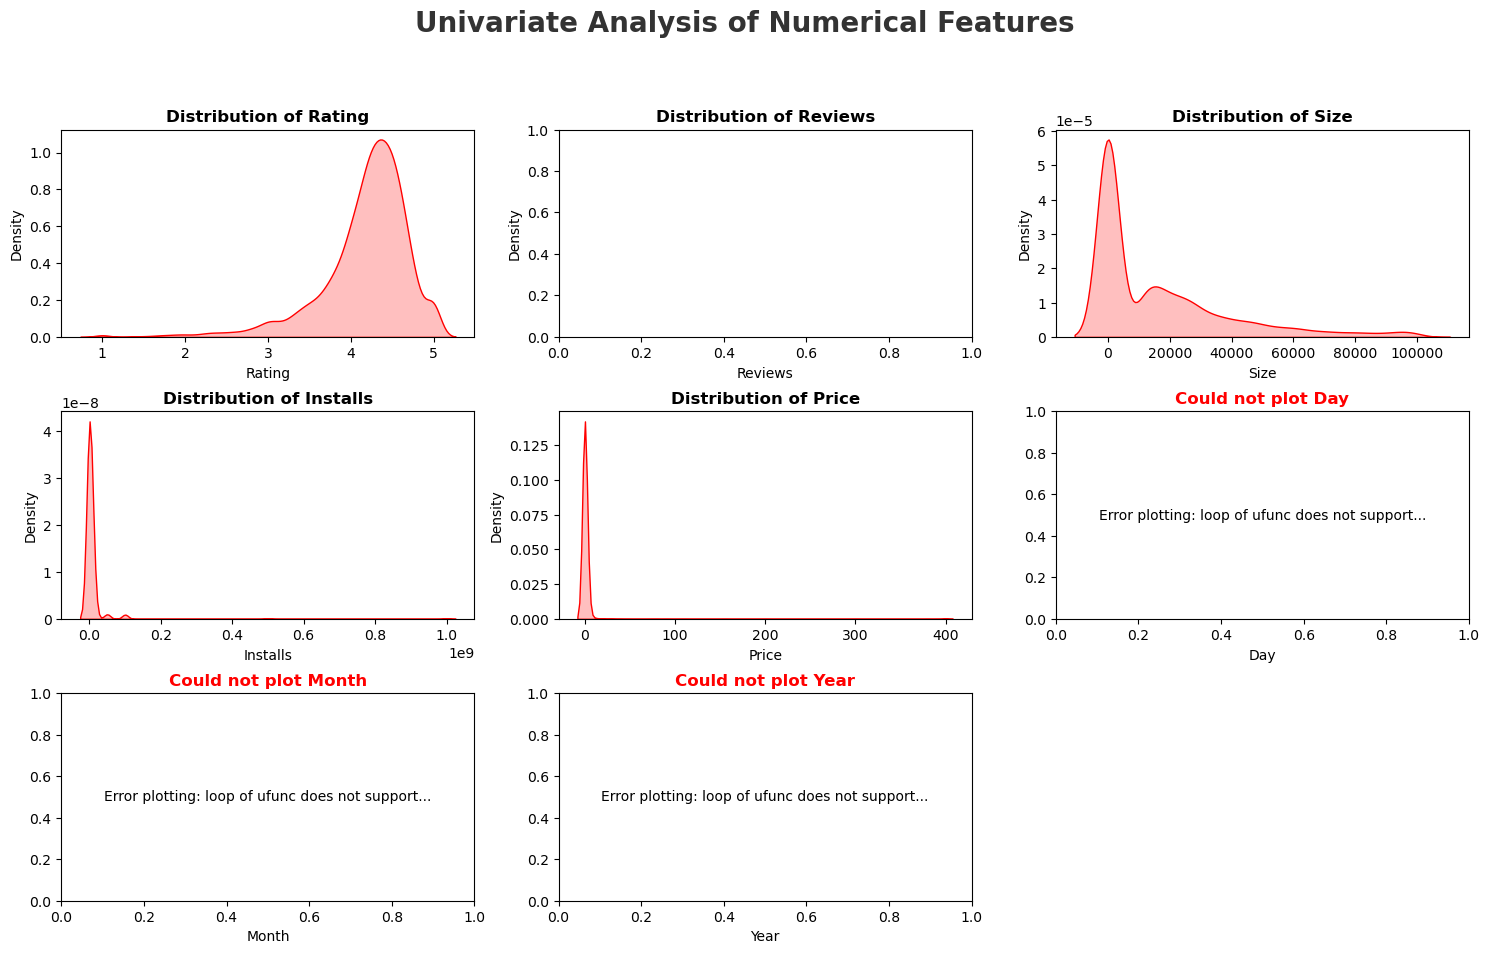

In [149]:
plt.figure(figsize=(15, 15))  # Increased height for better visibility
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=0.98)

for i in range(0, len(numeric_cols)):
    plt.subplot(5, 3, i+1)
    
    # Get the column data and drop any NaN values
    data = df_copy[numeric_cols[i]].dropna()
    
    # Check if we have valid data for this column
    if len(data) > 0 and data.dtype.kind in 'iufc':  # integer, unsigned int, float, complex
        try:
            # Use newer parameter 'fill' instead of deprecated 'shade'
            sns.kdeplot(x=data, fill=True, color='r')
            plt.title(f'Distribution of {numeric_cols[i]}', fontsize=12, fontweight='bold')
        except Exception as e:
            plt.text(0.5, 0.5, f"Error plotting: {str(e)[:30]}...", 
                    horizontalalignment='center', verticalalignment='center')
            plt.title(f'Could not plot {numeric_cols[i]}', fontsize=12, fontweight='bold', color='red')
    else:
        plt.text(0.5, 0.5, "Invalid data for KDE plot", 
                horizontalalignment='center', verticalalignment='center')
        plt.title(f'Could not plot {numeric_cols[i]}', fontsize=12, fontweight='bold', color='red')
    
    plt.xlabel(numeric_cols[i])

# Adjust layout after all subplots are created
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\681289521.py:20: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=col_data, fill=True, color='red')
c:\Users\Saeed Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

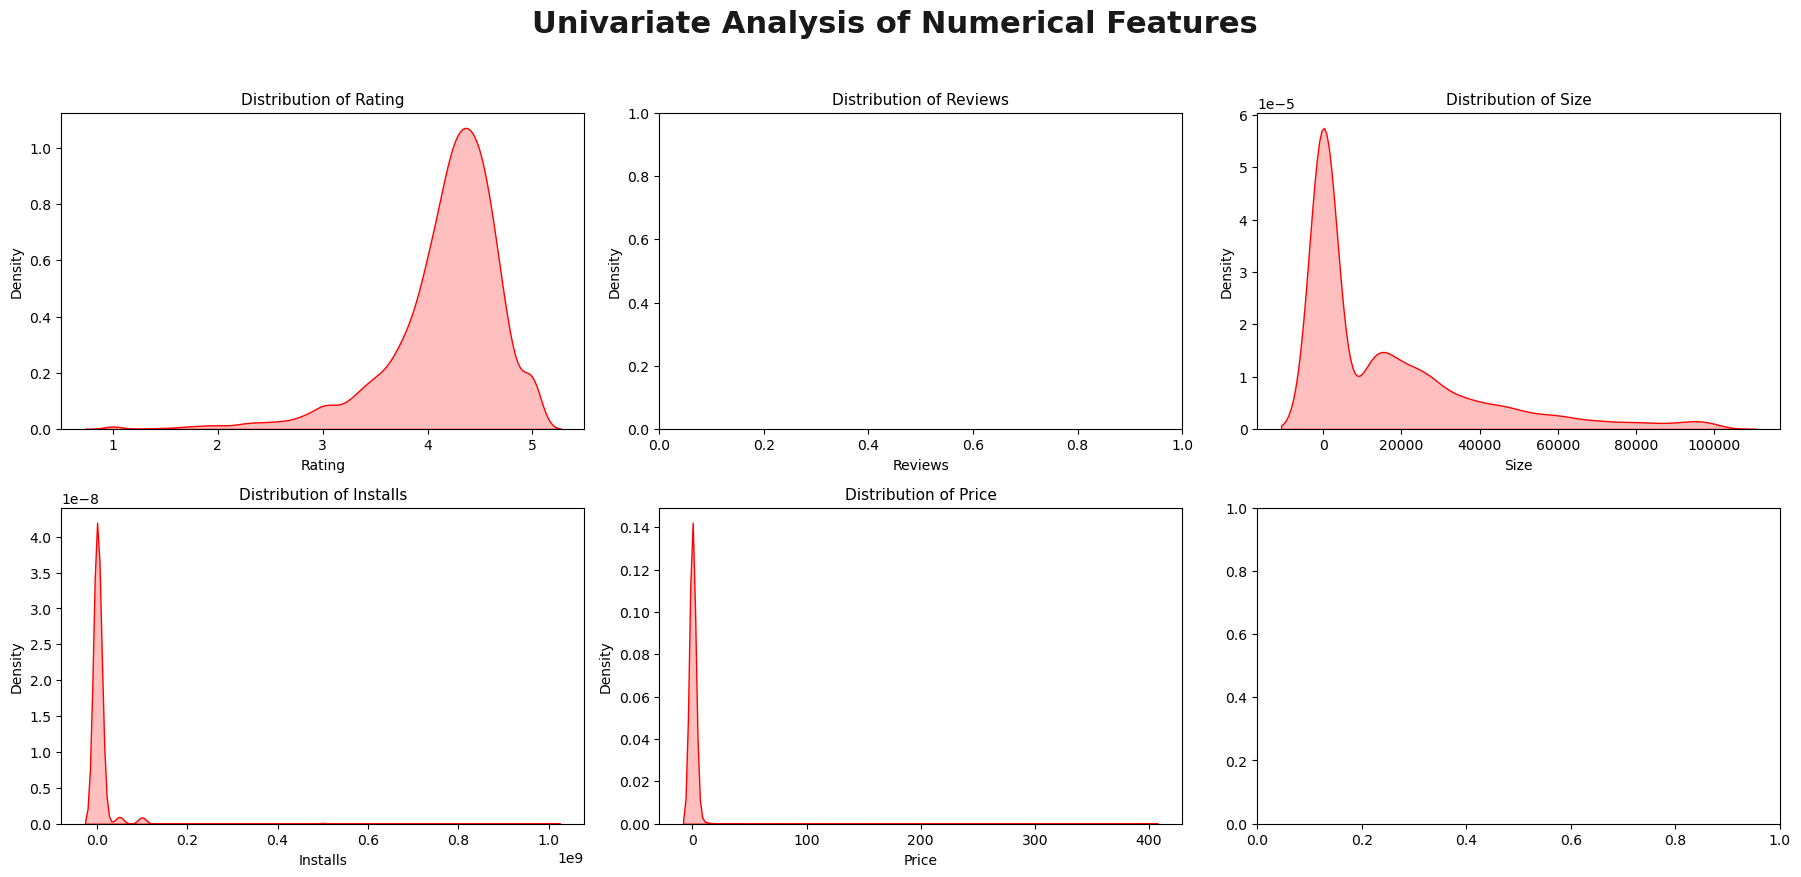

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_copy is your DataFrame and numeric_cols contains numeric column names
# Example: numeric_cols = df_copy.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(18, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=22, fontweight='bold', alpha=0.9, y=1.02)

rows = (len(numeric_cols) // 3) + 1

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)

    # Ensure data is numeric and no NaNs
    col_data = pd.to_numeric(df_copy[col], errors='coerce').dropna()

    if not col_data.empty:
        sns.kdeplot(data=col_data, fill=True, color='red')
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.title(f'Distribution of {col}', fontsize=11)
    else:
        plt.text(0.5, 0.5, 'No valid data', ha='center', va='center')
        plt.axis('off')

    plt.tight_layout()

plt.show()


# **Observations**
- Rating,Year is left skwed while Reviews,Price. installs is right skewed.

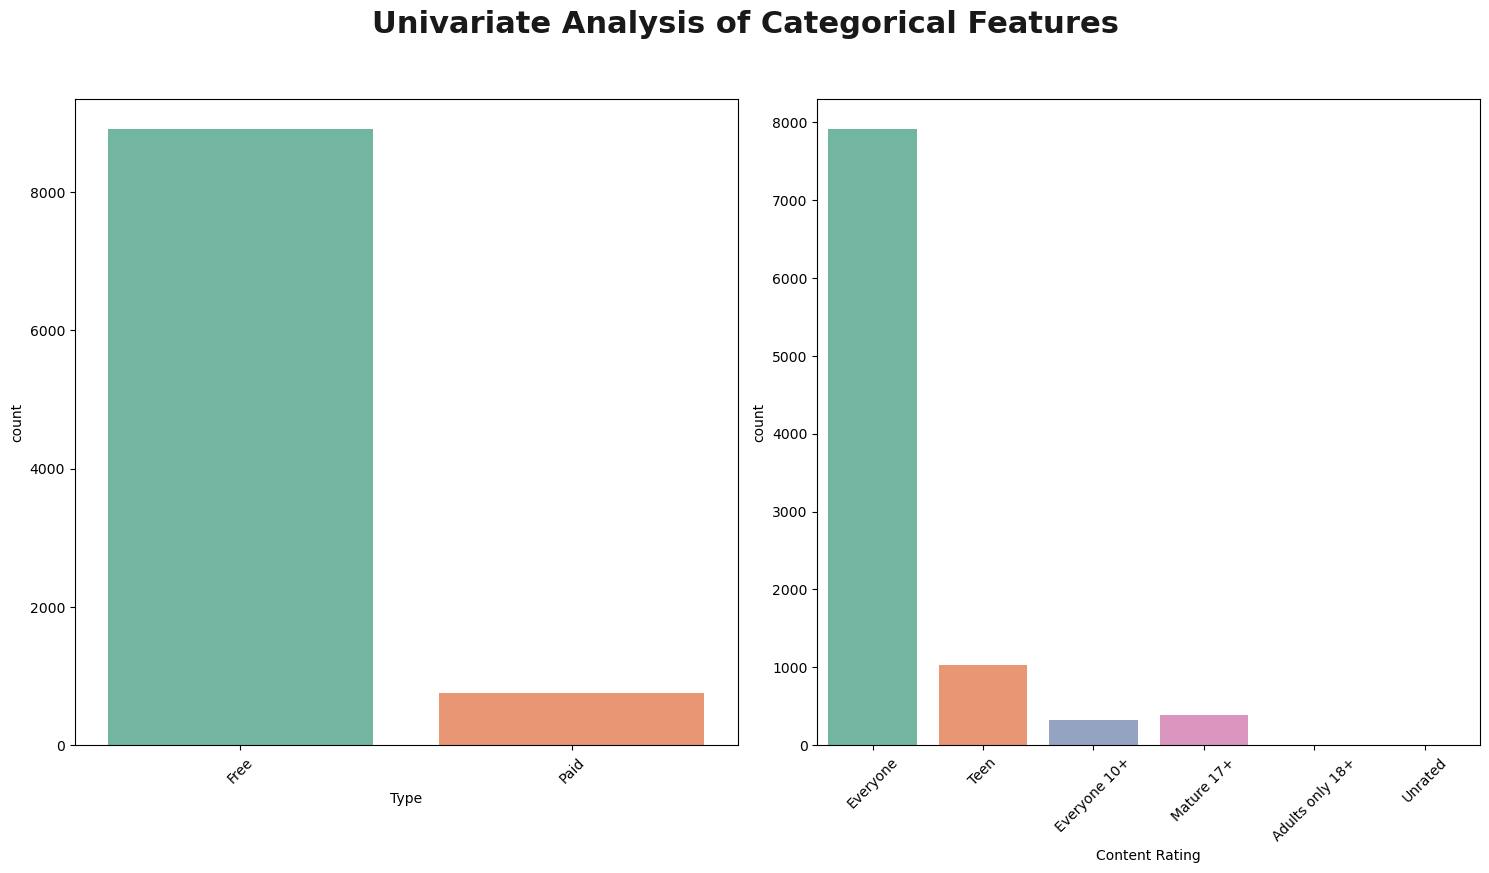

In [157]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=22, fontweight='bold', alpha=0.9, y=1.02)
category=['Type','Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=category[i], data=df_copy, palette='Set2')
    plt.xlabel(category[i], fontsize=10)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()



# **Which is the most popular app category?**

In [158]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<Axes: ylabel='count'>

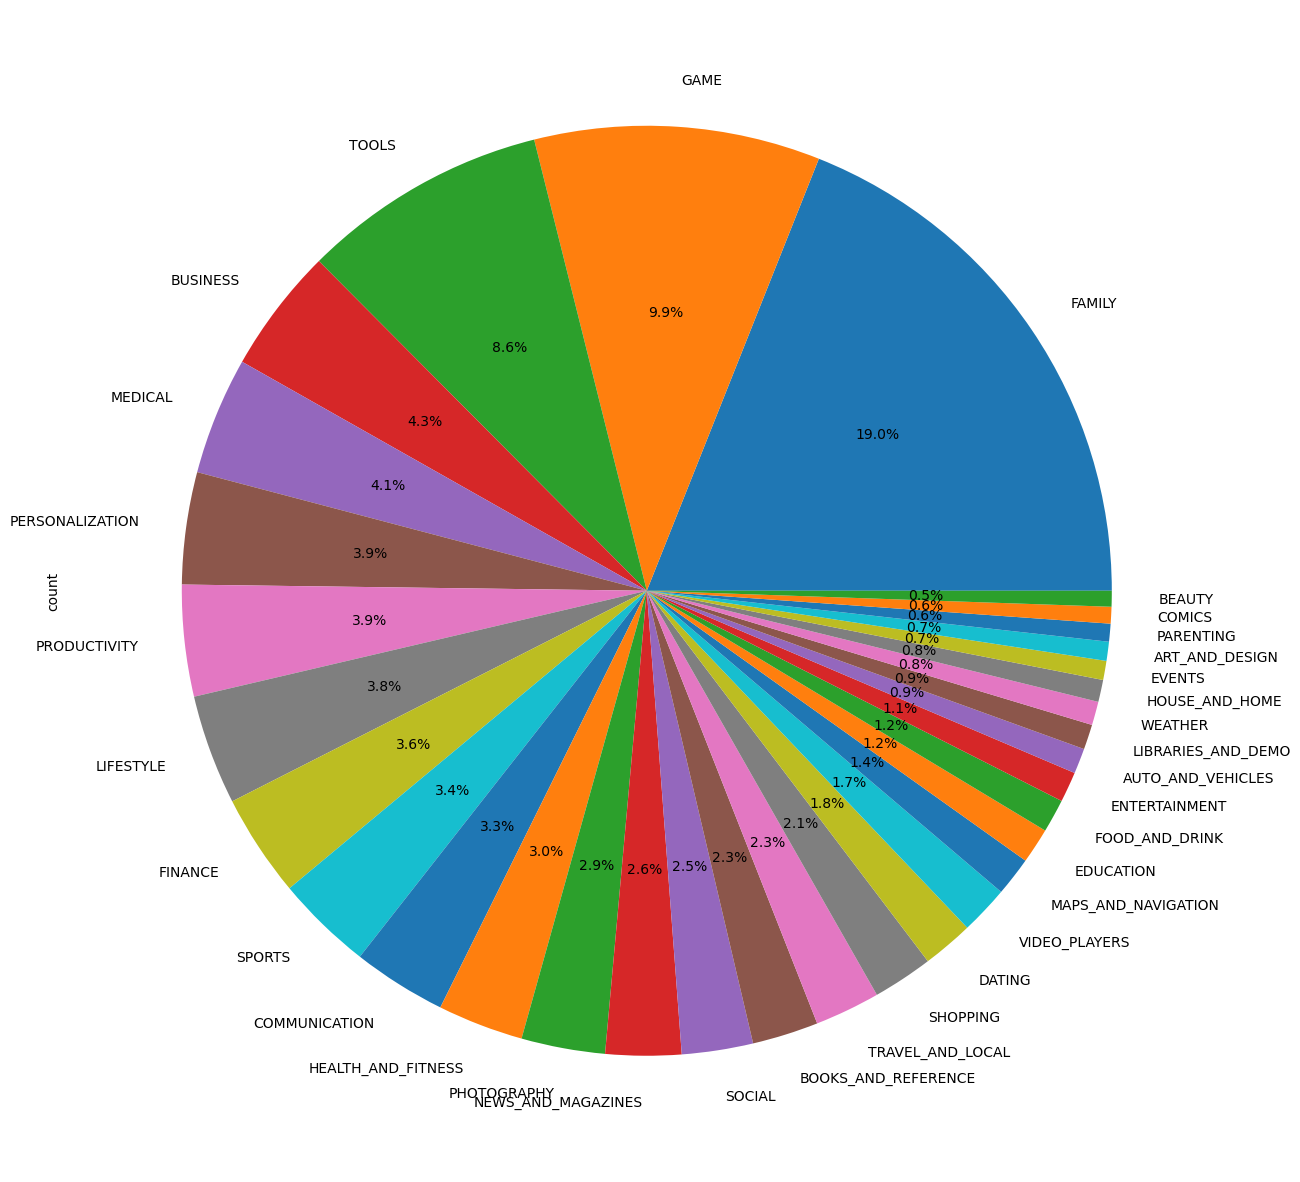

In [166]:
df_copy['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15, 16),autopct='%1.1f%%')

# **Observations**
- 1. The most popular app category is Family, followed by Game and Tools.
- 2. The least popular app category is Weather, followed by Beauty and Comics.

# **Top 10 most popular app categories**

In [167]:
category=pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [168]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


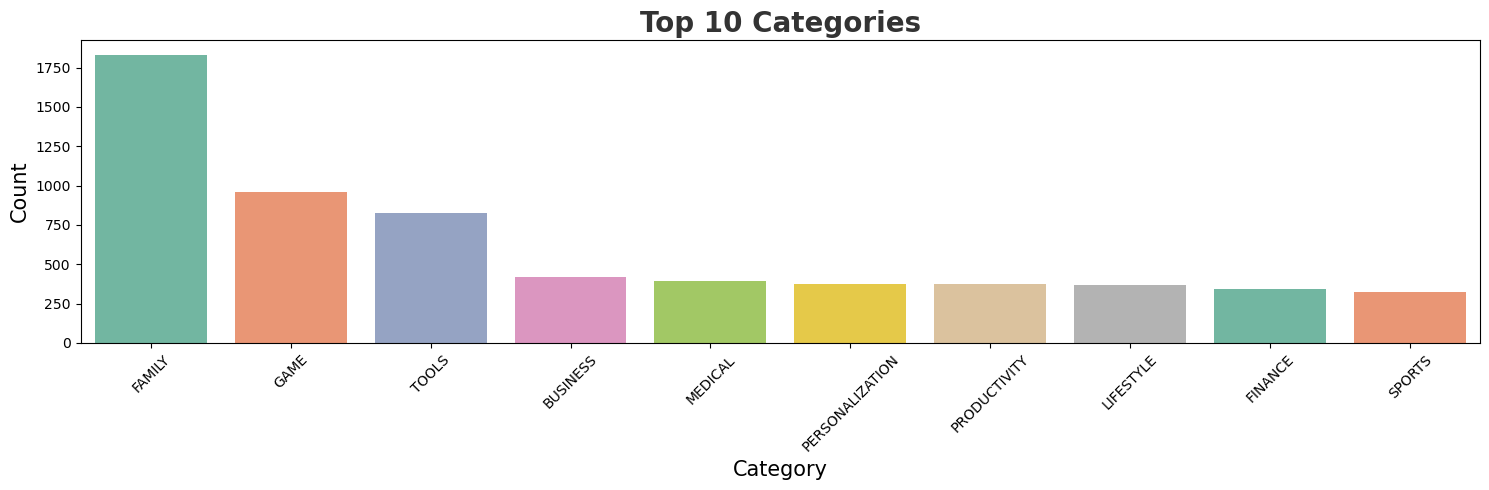

In [169]:
# top 10 app
plt.figure(figsize=(15, 5))
sns.barplot(x=df_copy['Category'].value_counts()[:10].index, y=df_copy['Category'].value_counts()[:10].values, palette='Set2')
plt.title('Top 10 Categories', fontsize=20, fontweight='bold', alpha=0.8)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()  # Show the plot

# Insights and Observations
- Family is the most number of apps 18.4% followed by Game 10.2% and Tools 8.4%.
- The least number of apps is Weather 0.2% followed by Beauty 0.3% and Comics 0.4%.
- The most popular app category is Family, followed by Game and Tools.

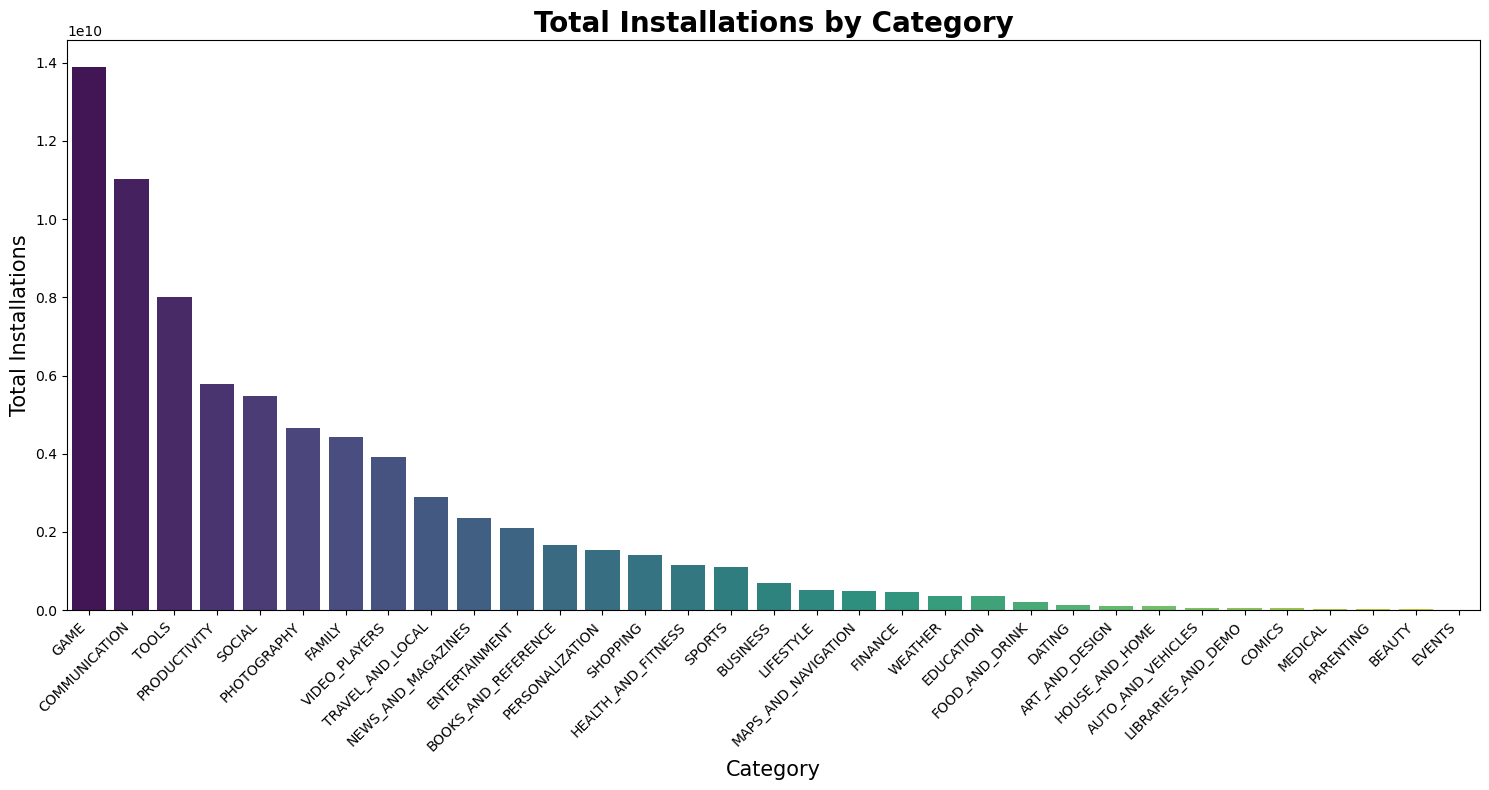

In [170]:
import seaborn as sns


import matplotlib.pyplot as plt

# Group by 'Category' and sum the 'Installs'
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x=category_installs.index, y=category_installs.values, palette='viridis')
plt.title('Total Installations by Category', fontsize=20, fontweight='bold')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total Installations', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Insights and Observations
- which ctaegory has the largest number of installations.

C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\2747410485.py:12: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  plt.tight_layout()
C:\Users\Saeed Khan\AppData\Local\Temp\ipykernel_13284\2747410485.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\Saeed Khan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


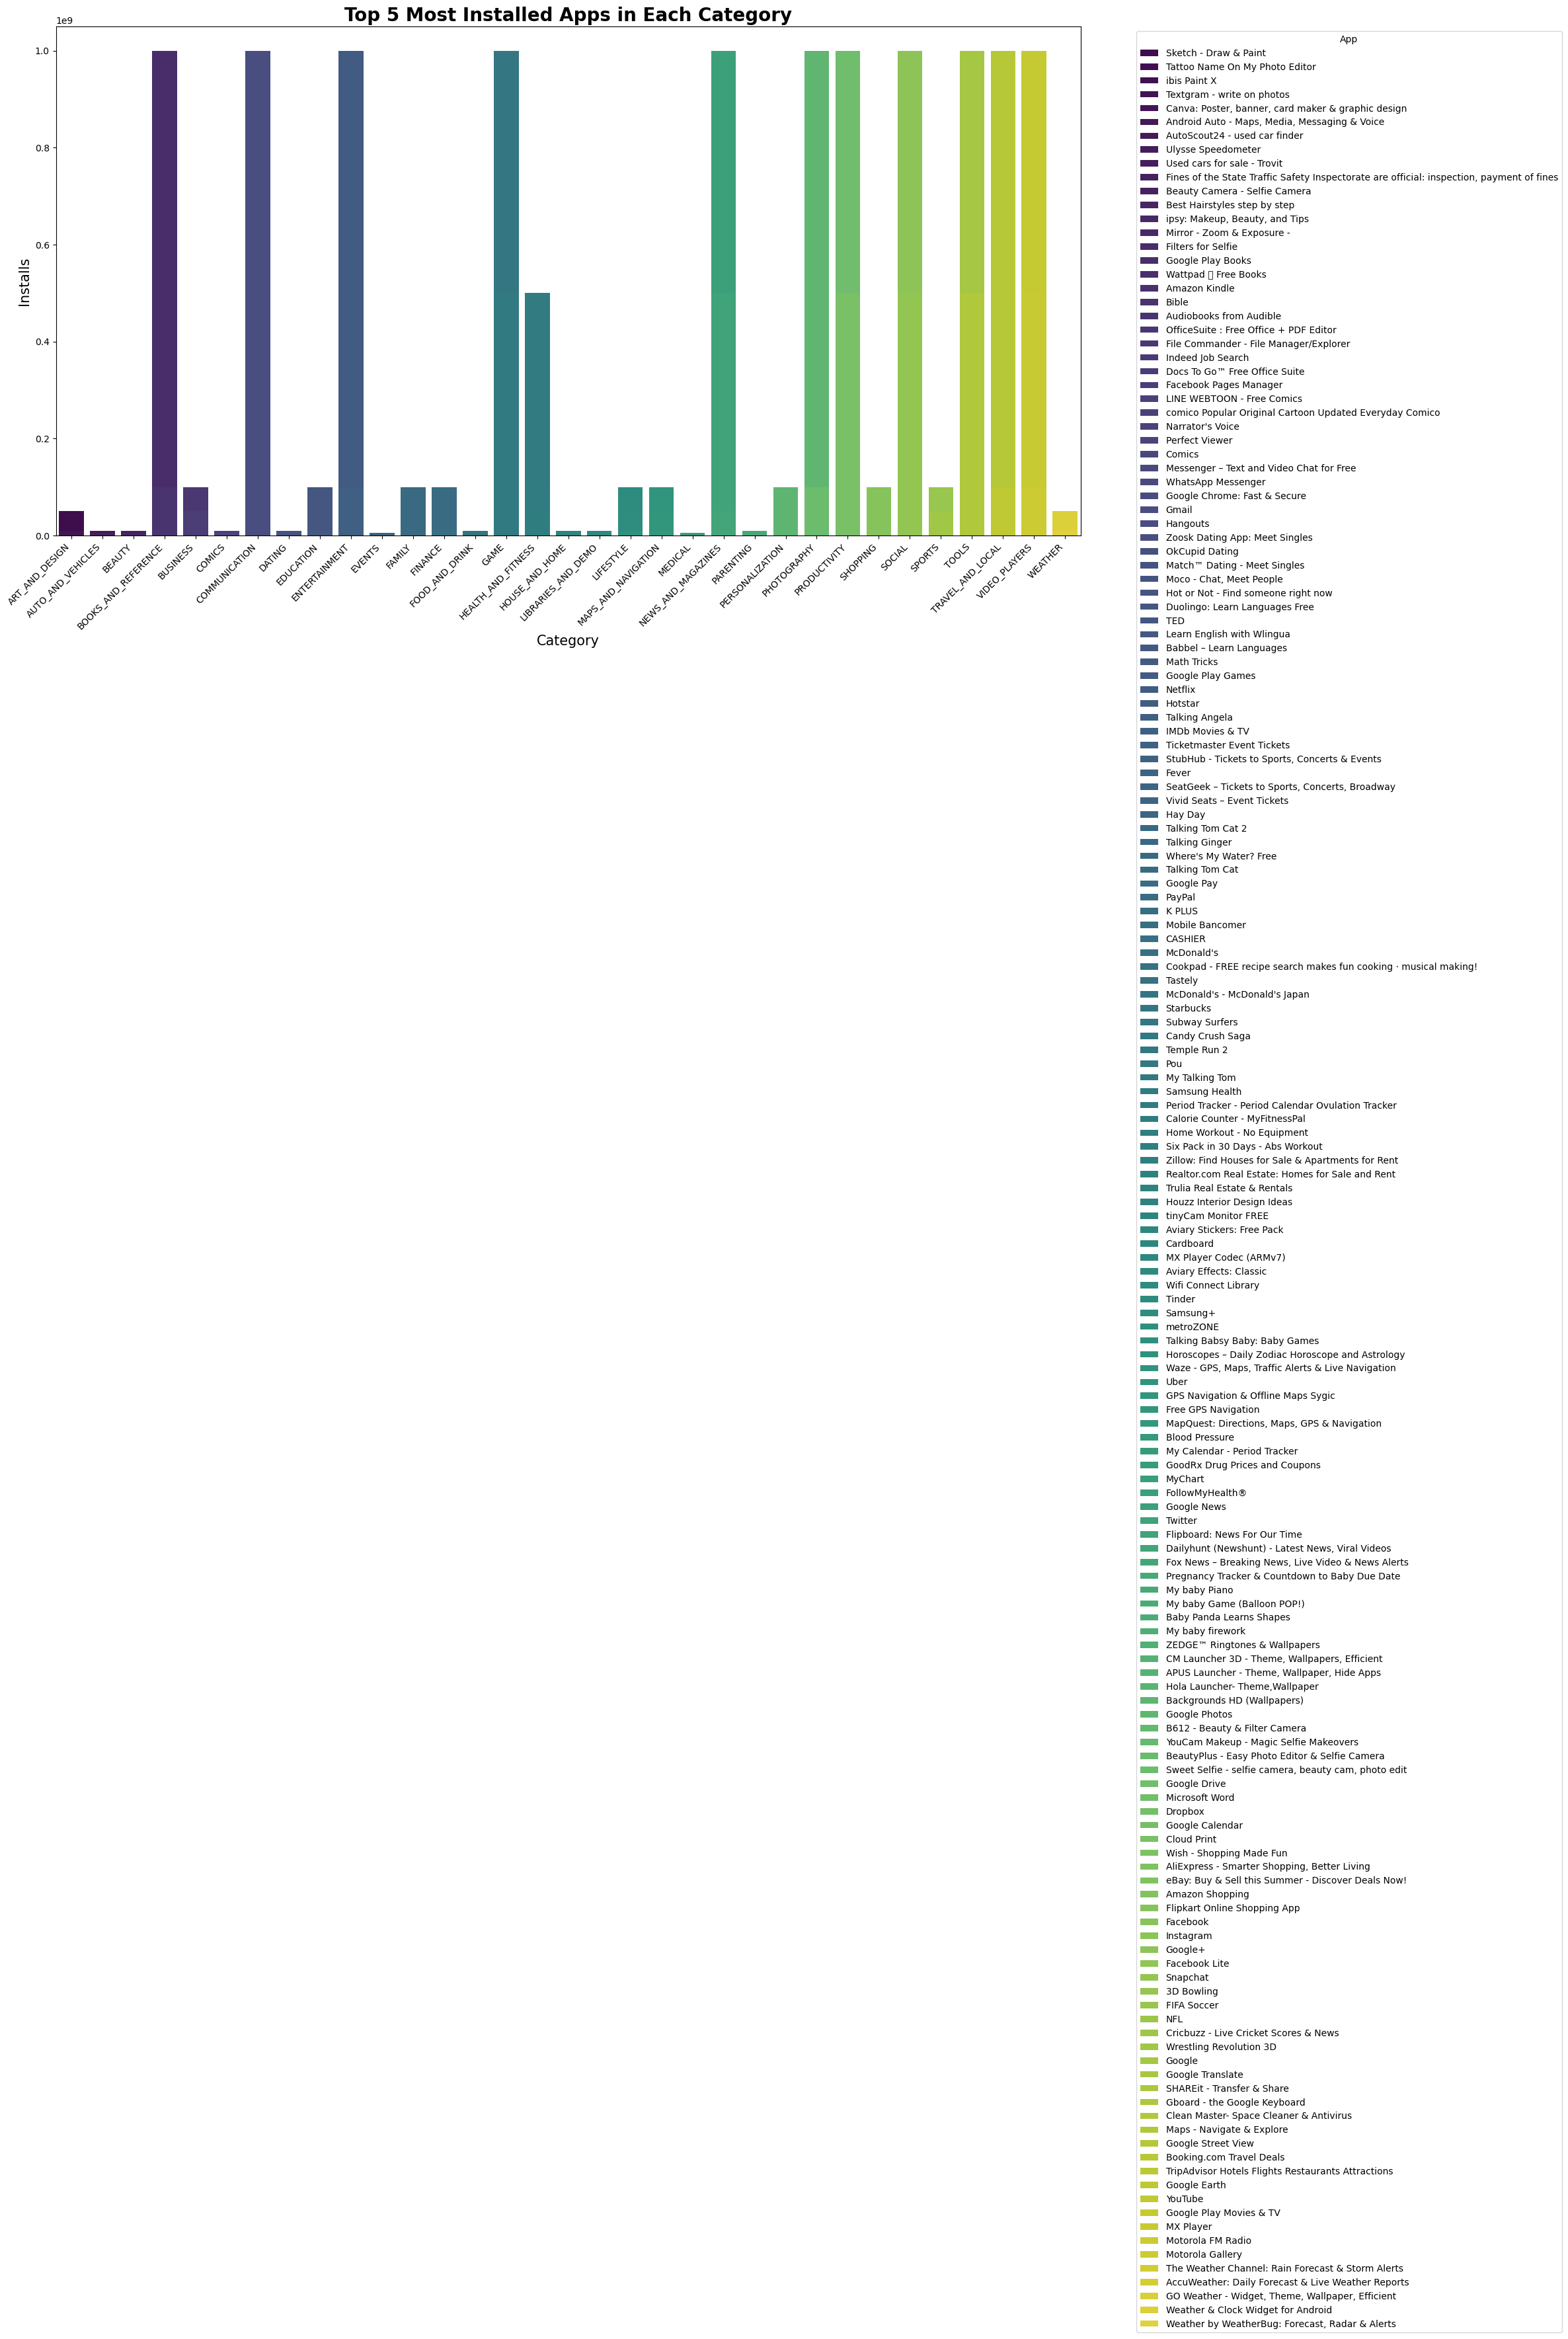

In [171]:
# Group by 'Category' and find the top 5 apps with the most installs in each category
top_installed_apps = df_copy.groupby('Category').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Plot the data
plt.figure(figsize=(20, 10))
sns.barplot(data=top_installed_apps, x='Category', y='Installs', hue='App', dodge=False, palette='viridis')
plt.title('Top 5 Most Installed Apps in Each Category', fontsize=20, fontweight='bold')
plt.xlabel('Category', fontsize=15)
plt.ylabel('Installs', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='App', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [172]:
# Count the number of apps with a rating of 5
apps_with_5_rating = df_copy[df_copy['Rating'] == 5].shape[0]
print(f"Number of apps with a 5 rating: {apps_with_5_rating}")

Number of apps with a 5 rating: 271


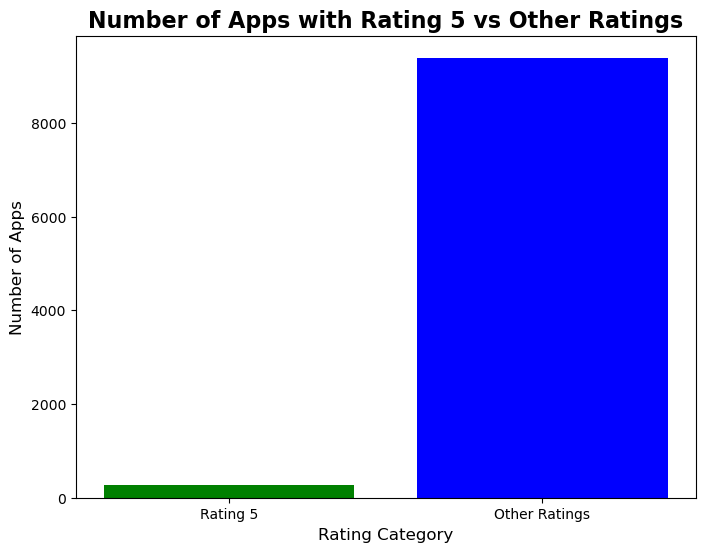

In [173]:
# Count the number of apps with a rating of 5
apps_with_5_rating = df_copy[df_copy['Rating'] == 5].shape[0]
apps_without_5_rating = df_copy.shape[0] - apps_with_5_rating

# Data for the bar chart
rating_counts = {'Rating 5': apps_with_5_rating, 'Other Ratings': apps_without_5_rating}

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.keys(), rating_counts.values(), color=['green', 'blue'])
plt.title('Number of Apps with Rating 5 vs Other Ratings', fontsize=16, fontweight='bold')
plt.ylabel('Number of Apps', fontsize=12)
plt.xlabel('Rating Category', fontsize=12)
plt.show()